# Predicting Temperature based on the values of the Air Quality parameters

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep=';')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"


In [4]:
df['T'] = df['T'].apply(lambda x: x.replace(',','.',1))

In [5]:
df['RH'] = df['RH'].apply(lambda x: x.replace(',','.',1))

In [6]:
df['AH'] = df['AH'].apply(lambda x: x.replace(',','.',1))

In [7]:
df['CO(GT)'] = df['CO(GT)'].apply(lambda x: x.replace(',','.',1))
df['C6H6(GT)'] = df['C6H6(GT)'].apply(lambda x: x.replace(',','.',1))

In [8]:
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = pd.DataFrame(data=df[['CO(GT)','C6H6(GT)','T','RH','AH']], dtype=np.float64)

In [9]:
df.corr()['T'].sort_values()

NOx(GT)         -0.138452
NO2(GT)         -0.084104
CO(GT)          -0.068939
NMHC(GT)        -0.000009
PT08.S5(O3)      0.503700
PT08.S3(NOx)     0.588111
PT08.S2(NMHC)    0.669025
PT08.S1(CO)      0.754844
PT08.S4(NO2)     0.755060
RH               0.885911
C6H6(GT)         0.971375
AH               0.981001
T                1.000000
Name: T, dtype: float64

In [10]:
df['Date_Time'] = df['Date'] +'T'+ df['Time']

In [11]:
df['Date_Time'] = df['Date_Time'].apply(lambda x: x.replace('.','',2))

In [12]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'],infer_datetime_format=True)

In [13]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-10-03 18:00:00
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-10-03 19:00:00
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-10-03 20:00:00
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-10-03 21:00:00
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-10-03 22:00:00


In [14]:
df['Time'] = df['Time'].apply(lambda x: x.replace('.',':',2))

In [15]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [16]:
df.dtypes

Date                     object
Time             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
Date_Time        datetime64[ns]
dtype: object

In [17]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   datetime64[ns]
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   int64         
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   int64         
 7   NOx(GT)        9357 non-null   int64         
 8   PT08.S3(NOx)   9357 non-null   int64         
 9   NO2(GT)        9357 non-null   int64         
 10  PT08.S4(NO2)   9357 non-null   int64         
 11  PT08.S5(O3)    9357 non-null   int64         
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Date_Time      9357 n

In [19]:
df = df.drop(['Date_Time', 'NOx(GT)', 'NO2(GT)', 'NMHC(GT)', 'Date','Time'], axis = 1)

In [20]:
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,2.0,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,2.2,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,2.2,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,1.6,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888


In [21]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,1.865683,894.595276,794.990168,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,41.380206,342.333252,321.993552,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,4.000000,711.000000,637.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,7.900000,895.000000,794.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,13.600000,1105.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [22]:
X = df.drop("T", axis=1).values
y = df['T'].values

In [23]:
y

array([13.6, 13.3, 11.9, ..., 26.9, 28.3, 28.5])

In [24]:
X

array([[2.600e+00, 1.360e+03, 1.190e+01, ..., 1.268e+03, 4.890e+01,
        7.578e-01],
       [2.000e+00, 1.292e+03, 9.400e+00, ..., 9.720e+02, 4.770e+01,
        7.255e-01],
       [2.200e+00, 1.402e+03, 9.000e+00, ..., 1.074e+03, 5.400e+01,
        7.502e-01],
       ...,
       [2.400e+00, 1.142e+03, 1.240e+01, ..., 1.092e+03, 1.830e+01,
        6.406e-01],
       [2.100e+00, 1.003e+03, 9.500e+00, ..., 7.700e+02, 1.350e+01,
        5.139e-01],
       [2.200e+00, 1.071e+03, 1.190e+01, ..., 8.160e+02, 1.310e+01,
        5.028e-01]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34,random_state=42)

In [27]:
# Single neuron in the last layer is causing Received a label value of 43 which is outside the valid range of [0, 1)
# Why??


air_qual_model1 = tf.keras.models.Sequential([
                 tf.keras.layers.Flatten(),
                 tf.keras.layers.Dense(365,activation=tf.nn.leaky_relu),
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(365,activation=tf.nn.leaky_relu),
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(365,activation=tf.nn.leaky_relu),
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(2,activation=tf.nn.leaky_relu)
                 ])

In [28]:
epochs=500
batch_size=350

In [29]:
steps_per_epoch = 5  #len(X_train)//batch_size #required becuase of the repeat() on the dataset
optimiser = tf.keras.optimizers.Adam()
air_qual_model1.compile (optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
steps_per_epoch

5

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train= scaler.fit_transform(X_train)

In [34]:
X_test = scaler.transform(X_test)

In [35]:
X_test.shape

(3182, 9)

In [36]:
X_train.shape

(6175, 9)

In [37]:
y_train = y_train.reshape(-1, 1)

In [38]:
y_test = y_test.reshape(-1, 1)

In [39]:
y_train = scaler.fit_transform(y_train)

In [40]:
y_test = scaler.fit_transform(y_test)

In [41]:
# May be one of the worst model - however, the accuracy is consistent between Training and Test dataset.
# Accuracy ~.03
# Loss ~.002

air_qual_model1.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), epochs=epochs, steps_per_epoch = steps_per_epoch)

Train on 6175 samples, validate on 3182 samples
Epoch 1/500
6175/6175 [==============================] - 1s 121us/sample - loss: 0.7659 - accuracy: 0.0355 - val_loss: 0.6931 - val_accuracy: 0.0383
Epoch 2/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.6799 - accuracy: 0.0395 - val_loss: 0.6931 - val_accuracy: 0.0383
Epoch 3/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.6249 - accuracy: 0.0395 - val_loss: 0.0083 - val_accuracy: 0.0383
Epoch 4/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0756 - accuracy: 0.0395 - val_loss: 0.0099 - val_accuracy: 0.0383
Epoch 5/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 6/500
6175/6175 [==============================] - 0s 31us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 7/500
6175/6175 [==============================] - 0s 32u

Epoch 56/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 57/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 58/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 59/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 60/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 61/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 62/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395

Epoch 111/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 112/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 113/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 114/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 115/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 116/500
6175/6175 [==============================] - 0s 43us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 117/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy:

6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 166/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 167/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 168/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 169/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 170/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 171/500
6175/6175 [==============================] - 0s 39us/sample - loss: 0.0026 - accuracy: 0.0395 - val_

Epoch 220/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 221/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 222/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 223/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 224/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 225/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 226/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy:

6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 275/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 276/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 277/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 278/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 279/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 280/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_

Epoch 329/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 330/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 331/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 332/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 333/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 334/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 335/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy:

6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 384/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 385/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 386/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 387/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 388/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 389/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_

Epoch 438/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 439/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 440/500
6175/6175 [==============================] - 0s 34us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 441/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 442/500
6175/6175 [==============================] - 0s 36us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 443/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 444/500
6175/6175 [==============================] - 0s 35us/sample - loss: 0.0026 - accuracy:

6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 493/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 494/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 495/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 496/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 497/500
6175/6175 [==============================] - 0s 33us/sample - loss: 0.0026 - accuracy: 0.0395 - val_loss: 0.0101 - val_accuracy: 0.0383
Epoch 498/500
6175/6175 [==============================] - 0s 32us/sample - loss: 0.0026 - accuracy: 0.0395 - val_

# Is this a Case of Underfitting??

In [42]:
air_qual_model1.evaluate(X_test, y_test)

3182/3182 [==============================] - 0s 54us/sample - loss: 0.0101 - accuracy: 0.0383


[0.010130915231175612, 0.038340665]

In [43]:
losses = pd.DataFrame(air_qual_model1.history.history)

In [44]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.765864,0.035466,0.693146,0.038341
1,0.679901,0.039514,0.693146,0.038341
2,0.624900,0.039514,0.008282,0.038341
3,0.075642,0.039514,0.009853,0.038341
4,0.002599,0.039514,0.010108,0.038341


<AxesSubplot:>

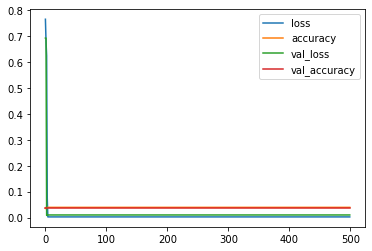

In [45]:
losses.plot()